In [105]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [107]:
#Carga de dataset
data = pd.read_csv('/content/Onion Prices 2020.csv')

In [108]:
print(data)

                 state            district                         market  \
0       Andhra Pradesh             Kurnool                        Kurnool   
1       Andhra Pradesh             Kurnool                        Kurnool   
2       Andhra Pradesh             Kurnool                        Kurnool   
3       Andhra Pradesh             Kurnool                        Kurnool   
4       Andhra Pradesh             Kurnool                        Kurnool   
...                ...                 ...                            ...   
107290     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107291     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107292     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107293     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107294     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   

       commodity variety arrival_date  min_price  max_price  modal_price  


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  object 
 1   district      107295 non-null  object 
 2   market        107295 non-null  object 
 3   commodity     107295 non-null  object 
 4   variety       107295 non-null  object 
 5   arrival_date  107295 non-null  object 
 6   min_price     107295 non-null  int64  
 7   max_price     107295 non-null  int64  
 8   modal_price   107295 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.4+ MB


In [110]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [111]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [112]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [114]:
#resultado
print(data)

        state  district  market  commodity  variety  arrival_date  min_price  \
0           0       178     486          0        9            18       1350   
1           0       178     486          0        9            27       1390   
2           0       178     486          0        9            45       1460   
3           0       178     486          0        9            54       2010   
4           0       178     486          0        9            81       1320   
...       ...       ...     ...        ...      ...           ...        ...   
107290     21       290     231          0       17            26       2200   
107291     21       290     231          0       17            35       2050   
107292     21       290     231          0       17            71       2700   
107293     21       290     231          0       17            80       2625   
107294     21       290     231          0       17            89       2800   

        max_price  modal_price  
0     

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  int64  
 1   district      107295 non-null  int64  
 2   market        107295 non-null  int64  
 3   commodity     107295 non-null  int64  
 4   variety       107295 non-null  int64  
 5   arrival_date  107295 non-null  int64  
 6   min_price     107295 non-null  int64  
 7   max_price     107295 non-null  int64  
 8   modal_price   107295 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 7.4 MB


In [116]:
#Se procede a eliminar la columna 'commodity', ya que estaba generando un valor NaN al normalizar.
#Al eliminar 'commodity' no afectaria en nuestros calculos por que es la unica categoria Onion
data.drop(columns=['commodity'], axis=1, inplace=True)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  int64  
 1   district      107295 non-null  int64  
 2   market        107295 non-null  int64  
 3   variety       107295 non-null  int64  
 4   arrival_date  107295 non-null  int64  
 5   min_price     107295 non-null  int64  
 6   max_price     107295 non-null  int64  
 7   modal_price   107295 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 6.5 MB


In [118]:
#Se selecciona a modal_price como el valor para Y, ya que es el precio al que normalmente se encontraria
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [119]:
print(X)
print('*'*25)
print(y)

        state  district  market  variety  arrival_date  min_price  max_price
0           0       178     486        9            18       1350       4390
1           0       178     486        9            27       1390       4400
2           0       178     486        9            45       1460       5150
3           0       178     486        9            54       2010       5200
4           0       178     486        9            81       1320       4050
...       ...       ...     ...      ...           ...        ...        ...
107290     21       290     231       17            26       2200       2300
107291     21       290     231       17            35       2050       2600
107292     21       290     231       17            71       2700       2875
107293     21       290     231       17            80       2625       2875
107294     21       290     231       17            89       2800       2890

[107295 rows x 7 columns]
*************************
0         3100.0
1     

In [120]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [121]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        state  district  market  variety  arrival_date  min_price  max_price
0           0       178     486        9            18       1350       4390
1           0       178     486        9            27       1390       4400
2           0       178     486        9            45       1460       5150
3           0       178     486        9            54       2010       5200
4           0       178     486        9            81       1320       4050
...       ...       ...     ...      ...           ...        ...        ...
107290     21       290     231       17            26       2200       2300
107291     21       290     231       17            35       2050       2600
107292     21       290     231       17            71       2700       2875
107293     21       290     231       17            80       2625       2875
107294     21       290     231       17            89       2800       2890

[107295 rows x 7 columns]
Media calculada: state             14.324302
dist

In [122]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [123]:
print(X)

[[ 1.         -2.57616621  0.3455329  ... -1.52695666 -0.37308232
   1.34117527]
 [ 1.         -2.57616621  0.3455329  ... -1.40424335 -0.34567397
   1.3475617 ]
 [ 1.         -2.57616621  0.3455329  ... -1.15881672 -0.29770935
   1.82654385]
 ...
 [ 1.          1.20059651  1.59668173 ... -0.8043116   0.55194963
   0.37363131]
 [ 1.          1.20059651  1.59668173 ... -0.68159829  0.50055897
   0.37363131]
 [ 1.          1.20059651  1.59668173 ... -0.55888498  0.62047052
   0.38321096]]


In [124]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [125]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [2004.65376797  -15.68565574    6.29360775   -2.50767789    5.44222074
  -11.61873544  736.93597023  764.07070467]
El valor predecido es (usando el descenso por el gradiente): 3637.1445


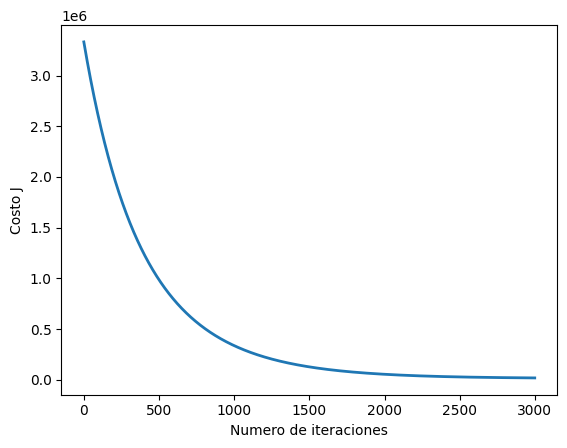

In [130]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una Cebolla con distintos parametros
X_array = [1, 2, 1, 300, 8, 25, 2440, 5000]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [100]:
X_array = [1, 2, 1, 300, 8, 25, 2440, 5000]
X_array[1:8] = (X_array[1:8] - mu) / sigma

In [101]:
X_array[1:8]

[-2.2164745226592633,
 -1.6317290832024884,
 -0.510546250361434,
 -1.4324982234532202,
 -1.4315129707685217,
 0.37379533140078824,
 1.7307474225674877]

In [102]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [131]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 2, 1, 300, 8, 25, 2440, 5000]
price = np.dot(X_array, theta)

print('Estimar el precio para una Cebolla con distintos parametros (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 2.10952322e+03 -2.24663860e+00  5.01667799e+00 -1.20659829e+00
  5.81882933e+00 -2.02808862e+00  6.55511307e+02  8.52929946e+02]
Estimar el precio para una Cebolla con distintos parametros (usando la ecuación de la normal): $5865841
